# WCE

## Principles of the WCE model 

The WCE model is a method used to study the effect of time-dependant exposures where the exposure status and its intensity varies over time. It is based on the notion of cumulated exposure and use convolutions to assign weights of varying intensity to time of past exposure. For a cohort of individuals with each an intensity of dose of a drug X(t), the joint effect of the past exposure is represented as : 

$$
\sum_{t=1}^{u} w(u-t) x(t)
$$

This represent the WCE function, giving weights to the effect of a drug, or any other exposition of varying intensity. 

$$
h(u \mid \mathbf{X}(u), Z(u)) = h_0(u) \exp \left[ \sum_{j=1}^{m} \gamma_j D_j(u) + \sum_{s=1}^{q} \eta_s Z_s(u) \right]
$$

## Connecting to the survivalGPU library



In [15]:
import torch
import os
import sys
import pykeops
import numpy as np
import pykeops
import matplotlib.pyplot as plt
from survivalgpu.simulation import get_scenario


sys.path.append("dev/survivalGPU/python")

os.getcwd()


'/home'

In [9]:
from survivalgpu.wce import wce_R
from survivalgpu.utils import device, float32, int32, int64
import pandas as pd 



# Simulate a dataset for testing


nknots = 1
batchsize = 100
n_bootsraps = 100
constraint = "Right"
cutoff = 180

dataset  = pd.read_csv("dev/survivalGPU/python/docs/datasets/dataset_1.csv")

print(dataset)


result_1 = wce_R(data= dataset, 
               ids = "patients", 
               covars = None,
               stop = "stop",
               doses = "wce_1", 
               events = "events",
               cutoff = 180,
               nknots = 2,
               constrained = "Right",
               )

        Unnamed: 0  patients  fup  start  stop  events  wce_1
0                0         1    1      0     1       0    3.0
1                1         2    1      0     1       1    2.0
2                2         3    1      0     1       1    3.0
3                3         4    1      0     1       1    3.0
4                4         5    1      0     1       1    1.0
...            ...       ...  ...    ...   ...     ...    ...
754319      754319      5000  365    360   361       0    0.0
754320      754320      5000  365    361   362       0    0.0
754321      754321      5000  365    362   363       0    0.0
754322      754322      5000  365    363   364       0    0.0
754323      754323      5000  365    364   365       1    0.0

[754324 rows x 7 columns]
Step 1 : Computing the WCE features... Done in 0.708s.

Step 2 : CoxPH regression... 
Pre-processing:
Working with 1 bootstrap, 1 channels, 365 death times,
754,324 rows (= observations) and 4 columns (= features).

Iteration   1

[1.5206607417834963]


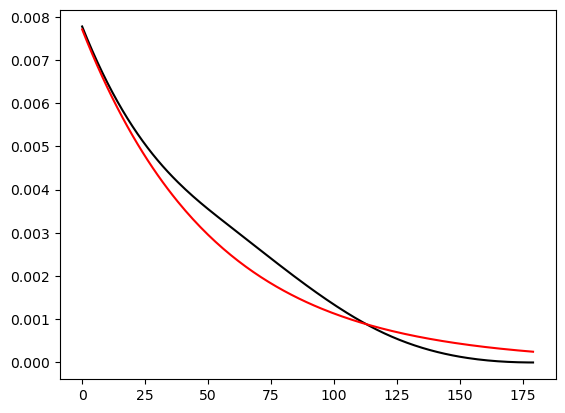

In [16]:
vecnum = np.ones(cutoff)
vecdenom = np.zeros(cutoff)
print(HR(result_1, vecnum, vecdenom))
# print(HR(result_2, vecnum, vecdenom))
plot_wce(WCE_object = result_1,
        scenario="exponential_scenario",
         HR_target = 1.5)

In [20]:

nknots = 1
constraint = "Right"
cutoff = 180

dataset  = pd.read_csv("dev/survivalGPU/python/docs/datasets/dataset_1.csv")

print(dataset)


result_bootstraps = wce_R(data= dataset, 
               ids = "patients", 
               covars = None,
               stop = "stop",
               doses = "wce_1", 
               events = "events",
               cutoff = 180,
               nknots = 2,
               constrained = "Right",
               bootstrap = 100,
               batchsize = 100
               )

        Unnamed: 0  patients  fup  start  stop  events  wce_1
0                0         1    1      0     1       0    3.0
1                1         2    1      0     1       1    2.0
2                2         3    1      0     1       1    3.0
3                3         4    1      0     1       1    3.0
4                4         5    1      0     1       1    1.0
...            ...       ...  ...    ...   ...     ...    ...
754319      754319      5000  365    360   361       0    0.0
754320      754320      5000  365    361   362       0    0.0
754321      754321      5000  365    362   363       0    0.0
754322      754322      5000  365    363   364       0    0.0
754323      754323      5000  365    364   365       1    0.0

[754324 rows x 7 columns]
Step 1 : Computing the WCE features... Done in 0.781s.

Step 2 : CoxPH regression... 
Pre-processing:
Working with 100 bootstrap, 1 channels, 365 death times,
754,324 rows (= observations) and 4 columns (= features).

Iteration  

In [42]:
print(result_bootstraps.keys())
# print(result_bootstraps["coef"])
coefs_mat = result_bootstraps["coef"]
print(np.sum(coefs_mat[1]))
print(np.exp(np.sum(coefs_mat[1])))
print(np.exp(0.6))
print(np.exp(0.66))




# calculate standard deviation of the HR of the different bootstraps 





dict_keys(['hessian', 'sctest init', 'loglik init', 'loglik', 'coef', 'u', 'imat', 'means', 'knotsmat', 'std', 'SED', 'WCEmat', 'est', 'vcovmat'])
0.018179502
1.0183457
1.8221188003905089
1.9347923344020317


[1.5206605504617023, 1.3300060513082266, 1.7089136842603527]


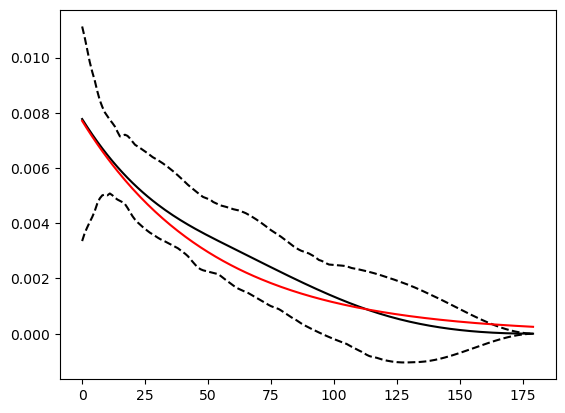

In [67]:
vecnum = np.ones(cutoff)
vecdenom = np.zeros(cutoff)
print(HR(result_bootstraps, vecnum, vecdenom))
# print(HR(result_2, vecnum, vecdenom))
plot_wce(WCE_object = result_bootstraps,
        scenario="exponential_scenario",
         HR_target = 1.5)

In [1]:
from survivalgpu.wce import wce_R
from survivalgpu.utils import device, float32, int32, int64
import pandas as pd 



# Simulate a dataset for testing


nknots = 1
batchsize = 100
n_bootsraps = 100
constraint = "Right"
cutoff = 180

dataset  = pd.read_csv("docs/dataset.csv")

print(dataset)


result_1 = wce_R(data= dataset, 
               ids = "patients", 
               covars = ["Constant_covariate","time_dependent","cumulative_time_dependent"],
               stop = "stop",
               doses = "wce_1", 
               events = "events",
               cutoff = 180,
               nknots = 2,
               constrained = "Right",
               )


result_2 = wce_R(data= dataset, 
               ids = "patients", 
               covars = ["Constant_covariate","time_dependent","cumulative_time_dependent"],
               stop = "stop",
               doses = "wce_2", 
               events = "events",
               cutoff = 180,
               nknots = 2,
               constrained = "Right",
               )




# result_2 = wce_R(data= dataset, 
#                ids = "patients", 
#                covars = ["Constant_covariate","time_dependent","cumulative_time_dependent"],
#                stop = "stop",
#                doses = "wce_2", 
#                events = "events",
#                cutoff = 180,
#                nknots = 2,
#                constrained = "Right",
#                bootstrap = 100,
#                batchsize = 100,
#                )



ModuleNotFoundError: No module named 'survivalgpu'

In [36]:
print(result_1["coef"][0][0])
print(result_1["coef"][0][1])
print(result_1["coef"][0][2])
print()
print(result_2["coef"][0][0])
print(result_2["coef"][0][1])
print(result_2["coef"][0][2])

# vecnum = np.ones(cutoff)
# vecdenom = np.zeros(cutoff)
# print(HR(result, vecnum, vecdenom))

0.41675273
0.3990006
0.7055241

0.4011544
0.3954031
0.709515


In [37]:
vecnum = np.ones(cutoff)
vecdenom = np.zeros(cutoff)
print(HR(result_1, vecnum, vecdenom))
# print(HR(result_2, vecnum, vecdenom))


[1.3817254395557257]


In [40]:

vecnum = np.ones(cutoff)
vecdenom = np.zeros(cutoff)
print(HR(result_2, vecnum, vecdenom))

[1.782336171634779]


print(result.keys())


## Plotting the WCE function 

We can plot the wce function in order to verify if the simulation make sens 



In [8]:
from matplotlib import pyplot as plt
from survivalgpu.simulation import get_scenario
import numpy as np


# get quantiles each column WCEmat

HR_target = 3

WCEmat = result["WCEmat"] /np.log(HR_target)
scenario_shape = get_scenario("exponential_scenario",365)[:180] 

quantiles = np.quantile(WCEmat, [0.025, 0.975], axis = 0)
plt.plot(np.arange(0, 180),WCEmat[0], c = "black", label = "calculated WCE function")
plt.plot(np.arange(0, 180),quantiles[0], c = "black", linestyle = "--")
plt.plot(np.arange(0, 180),quantiles[1], c = "black", linestyle = "--")
plt.plot((np.arange(0, 180)),scenario_shape[:180], c = "red", label = "scenario shape")
plt.legend()


NameError: name 'result' is not defined

In [56]:

WCEmat = result["WCEmat"]
print(WCEmat.shape[0])

NameError: name 'result' is not defined

In [11]:
def plot_wce(
        WCE_object,
        scenario =None,
        HR_target = None):
    
    WCE_mat = WCE_object["WCEmat"]
            
    plt.plot(np.arange(0, WCE_mat.shape[1]),WCE_mat[0], c = "black", label = "calculated WCE function")

    if WCE_mat.shape[0] > 1:
        quantiles = np.quantile(WCE_mat, [0.025, 0.975], axis = 0)
        plt.plot(np.arange(0, WCE_mat.shape[1]),quantiles[0], c = "black", linestyle = "--")
        plt.plot(np.arange(0, WCE_mat.shape[1]),quantiles[1], c = "black", linestyle = "--")

    
    
    if scenario is not None:
        scenario_shape = get_scenario(scenario,365)[:WCE_mat.shape[1]] * np.log(HR_target)
        plt.plot((np.arange(0, WCE_mat.shape[1])),scenario_shape[:WCE_mat.shape[1]], c = "red", label = "scenario shape")
    
# vecnu
# hr_matrix = np.exp(np.dot(WCEmat, vecnum)) / np.exp(np.dot(WCEmat, vecdenom))
# hr =hr_matrix[0]
# print(hr)
# print()

def HR(WCE_object, vecnum, vecdenom):

    WCEmat = WCE_object["WCEmat"]
    n_bootsraps = WCEmat.shape[0]
    HR_matrix = np.exp(np.dot(WCEmat, vecnum)) / np.exp(np.dot(WCEmat, vecdenom))

    HR = [HR_matrix[0]]
    if n_bootsraps == 1:
        return HR
    
    else:
        HR_quantiles = np.quantile(HR_matrix, [0.025, 0.975], axis = 0)
        HR.append(HR_quantiles[0])
        HR.append(HR_quantiles[1])
        return HR


In [53]:
vecnum = np.ones(180)
vecdenom = np.zeros(180)
HR(result, vecnum, vecdenom)

[1.410406636676834, 1.0135860910940306, 1.7973296594445514]

(100, 180)

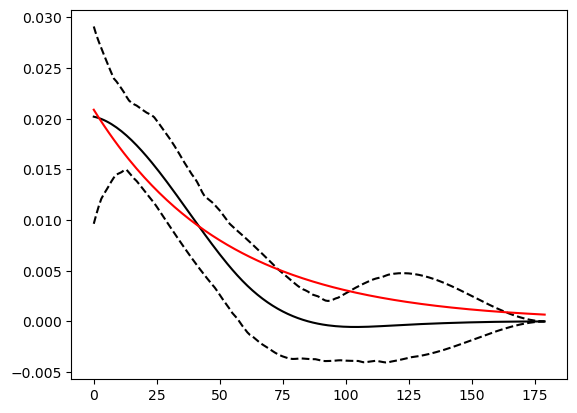

In [160]:
plot_wce(result, scenario = "exponential_scenario", HR_target = 3)
WCEmat.shape

In [21]:
print(result.keys())


dict_keys(['hessian', 'sctest init', 'loglik init', 'loglik', 'coef', 'u', 'imat', 'means', 'knotsmat', 'std', 'SED', 'WCEmat', 'est', 'vcovmat'])


In [30]:
import torch
import os
import sys
import numpy as np
import pandas as pd

sys.path.append("dev/survivalGPU/python/")
from survivalgpu.simulation import simulate_dataset, WCECovariate, ConstantCovariate, TimeDependentCovariate


wce_covariate_1 = WCECovariate(name="wce_1",
                            values = [1,1.5,2,2.5,3],
                            scenario_name="exponential_scenario",
                            HR_target=1.5)

wce_covariate_2 = WCECovariate(name="wce_2",
                            values = [1,1.5,2,2.5,3],
                            scenario_name="exponential_scenario",
                            HR_target=2)


ConstantCovariate 

time_dependent_covariate = TimeDependentCovariate(name="time_dependent",
                                                values = [0,1,1.5,2,2.5,3],
                                                coef = np.log(1.5))    

cumulative_time_dependent_covariate = TimeDependentCovariate(name="cumulative_time_dependent",
                                                values = [0,1,1.5,2,2.5,3],
                                                coef = np.log(2),
                                                cumulative=True,
                                                cutoff = 180)


Constant_covariate = ConstantCovariate(name = "Constant_covariate", 
                                    values = [0,1],
                                    coef = np.log(1.5),
                                    weights=[1,2])

list_covariates = [wce_covariate_1, wce_covariate_2, time_dependent_covariate, cumulative_time_dependent_covariate, Constant_covariate]

dataset = simulate_dataset(max_time = 365,
                            n_patients = 1000, 
                            list_covariates=list_covariates)


dataset.to_csv("dataset.csv", )

In [63]:
import torch
import os
import sys
import numpy as np
import pandas as pd

sys.path.append("dev/survivalGPU/python/")
from survivalgpu.simulation import simulate_dataset, WCECovariate, ConstantCovariate, TimeDependentCovariate


wce_covariate = WCECovariate(name="wce_1",
                            values = [1,1.5,2,2.5,3],
                            scenario_name="exponential_scenario",
                            HR_target=1.5)


list_covariates = [wce_covariate]

dataset = simulate_dataset(max_time = 365,
                            n_patients = 5000, 
                            list_covariates=list_covariates)


dataset.to_csv("docs/datasets/dataset_1.csv", )